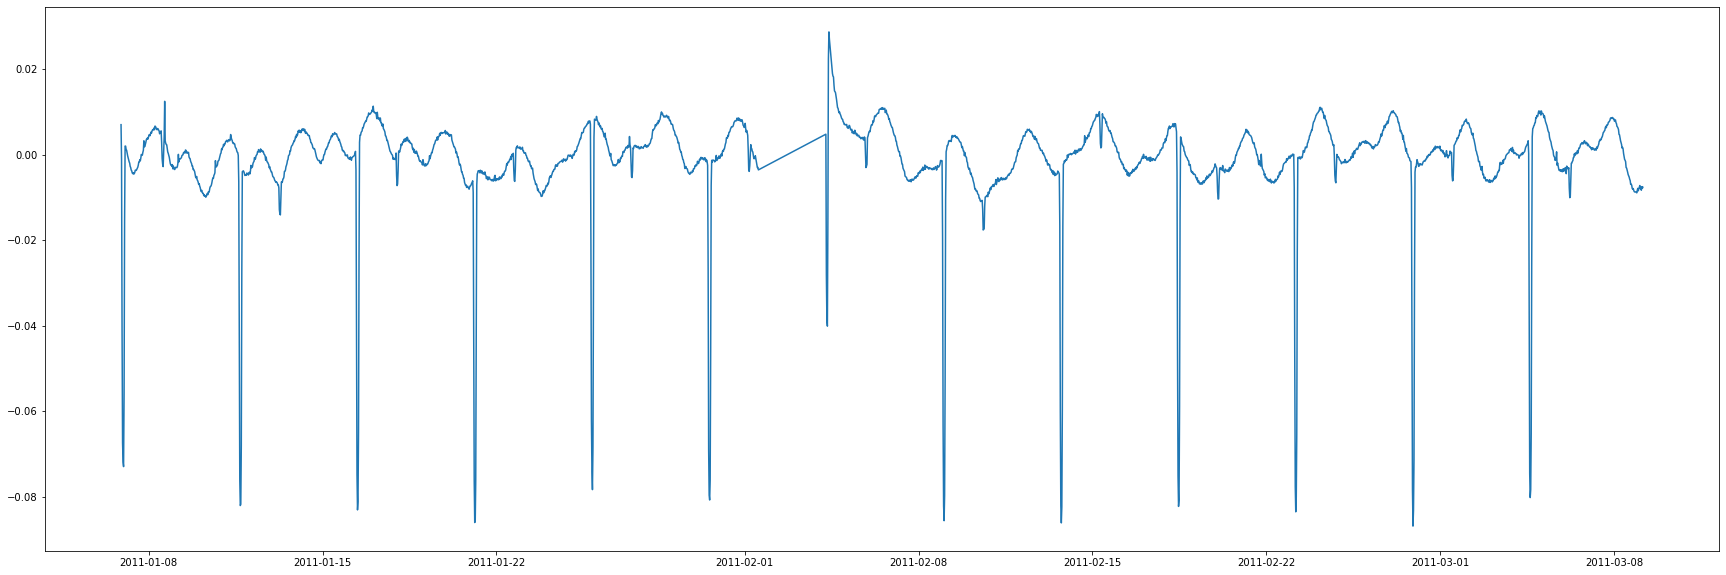

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv', sep=';')
#change TIME type to float
data['TIME'] = data['TIME'].astype(float)
data["TIME"] = data['TIME'] + 2454833
#Julian to timestamp
data['TIME'] = pd.to_datetime(data['TIME'], unit='D', origin='julian')

#set TIME as index
data.set_index('TIME', inplace=True)
data = data.dropna()
#size of plot (30,10)
plt.figure(figsize=(30,10))
plt.plot(data['LC_INIT'])
plt.show()

## First analyze of the dataset

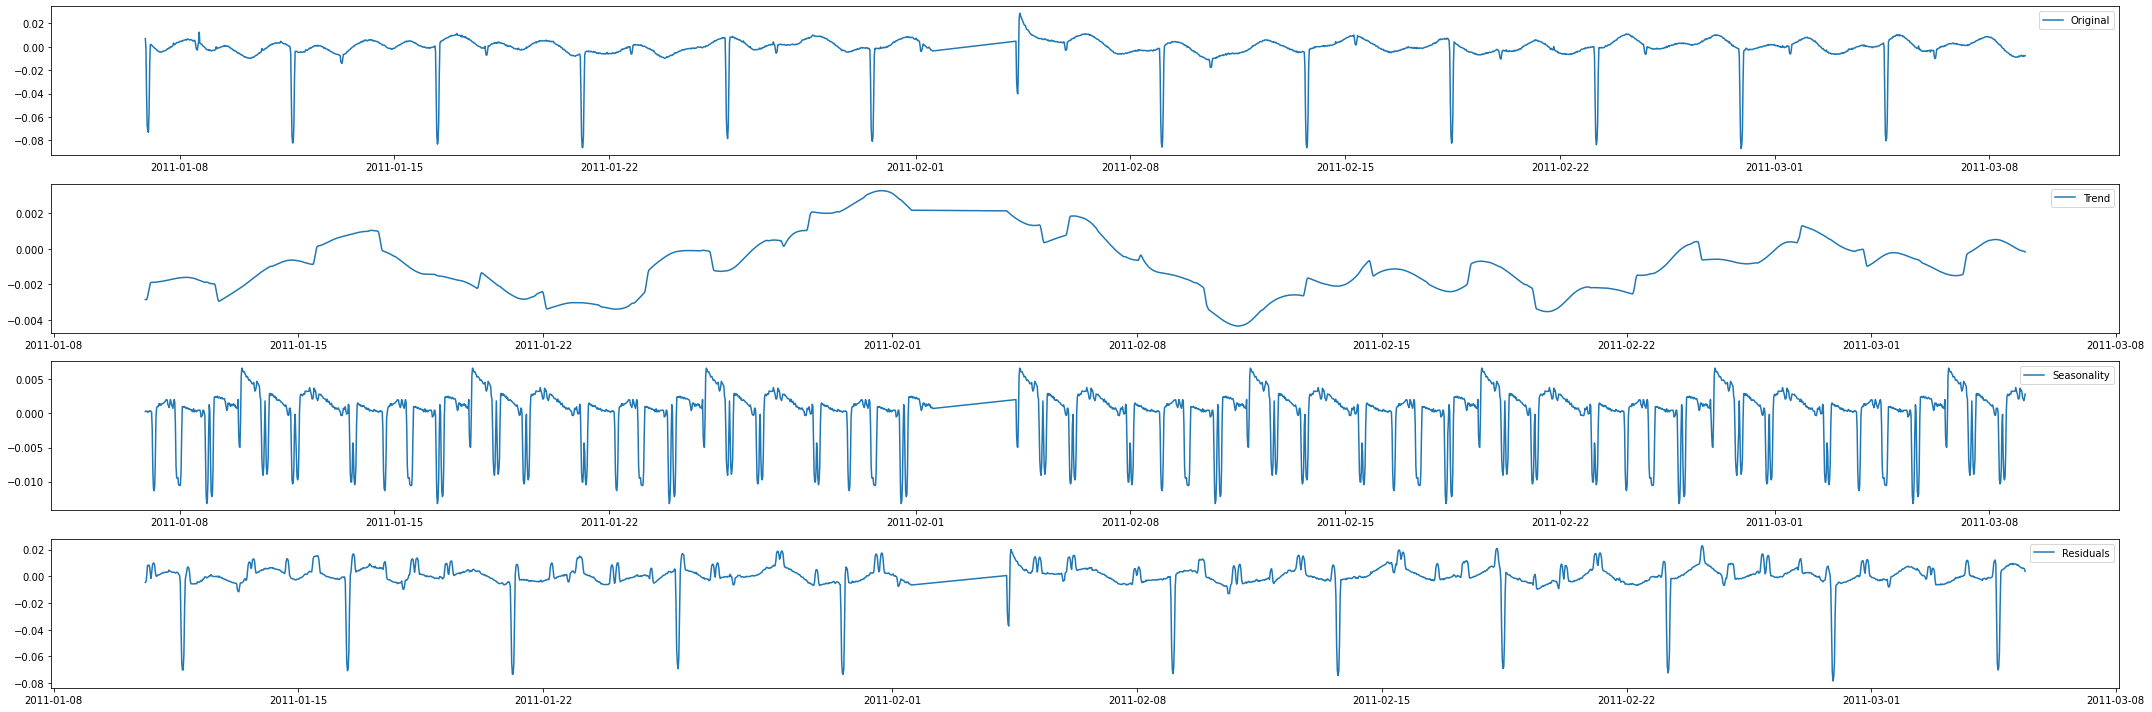

/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


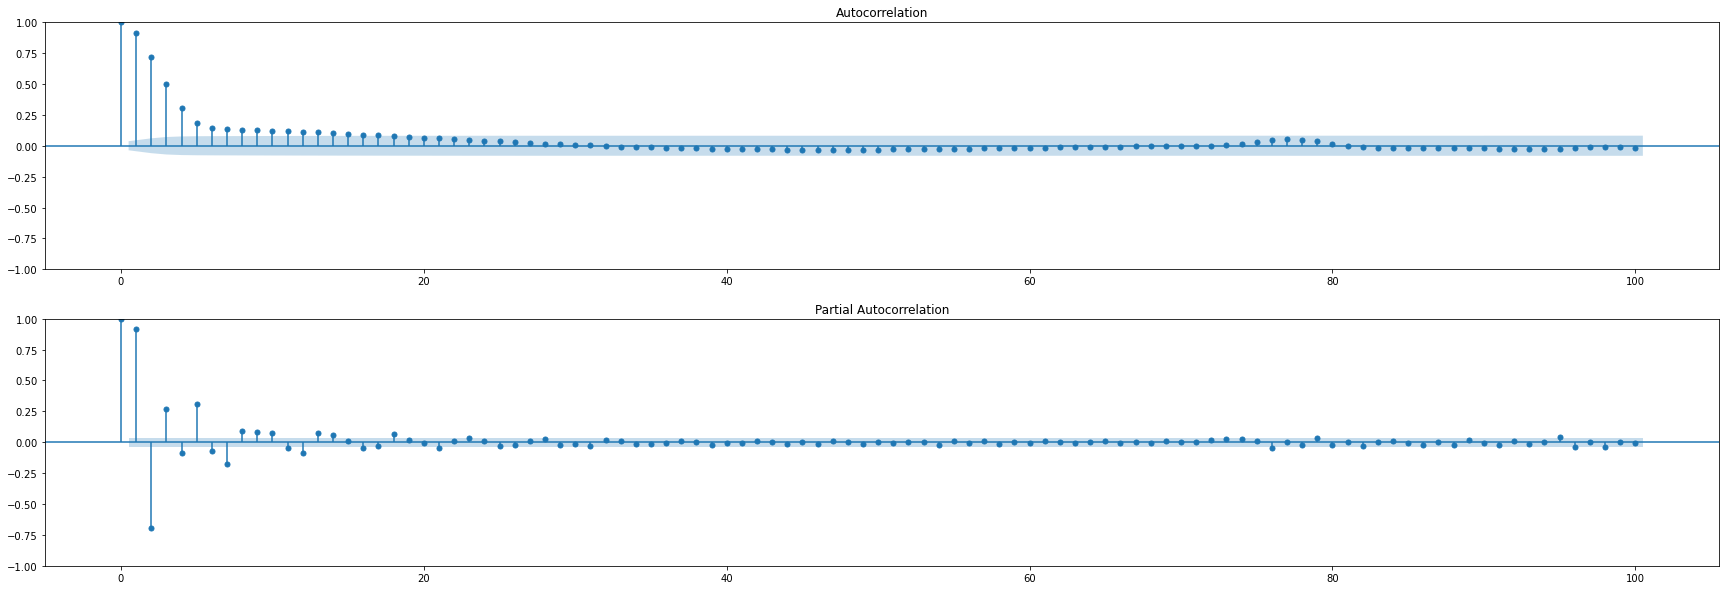

In [32]:
#seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['LC_INIT'], period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(30,10))
plt.subplot(411)
plt.plot(data['LC_INIT'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#ACF and PACF plots:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,10))
plot_acf(data['LC_INIT'], lags=100, ax=ax1)
plot_pacf(data['LC_INIT'], lags=100, ax=ax2)
plt.show()

## ADF Tests

We can concluse that the dataset is stationnary

In [35]:
from statsmodels.tsa.stattools import adfuller
stationarityTest = adfuller(data, autolag='AIC')
adf, pvalue, usedlag, nobs, critical_values, icbest = stationarityTest

print('ADF Statistic: %f' % adf)
print("P-value: %s" % pvalue)
print("Critical Values: ", critical_values)

print("Is the time series stationary? ", pvalue < 0.05)

ADF Statistic: -9.269339
P-value: 1.3399457782455633e-15
Critical Values:  {'1%': -3.43267762427534, '5%': -2.862568382202542, '10%': -2.567317439165414}
Is the time series stationary?  True
LC_INIT   -0.001044
dtype: float64


## AR Model

Test RMSE: 0.007


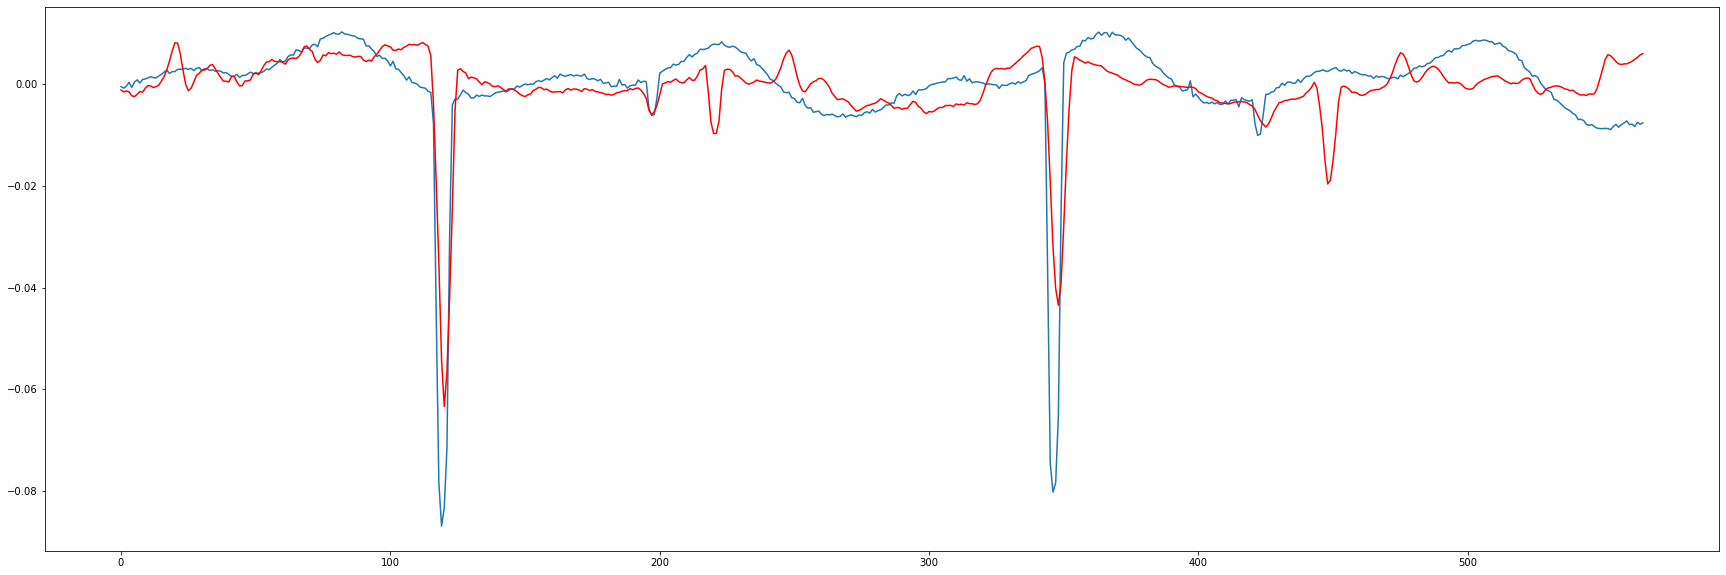

In [47]:
#AR model
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

X = data['LC_INIT'].values
#split data into train and test 80%
train, test = X[1:len(X)-int(len(X)*0.2)], X[len(X)-int(len(X)*0.2):]

#train autoregression
model = AutoReg(train, lags=365)
model_fit = model.fit()

#make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

#plot results
plt.figure(figsize=(30,10))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()



## MA model

In [60]:
#Moving average model
from statsmodels.tsa.arima.model import ARIMA

#train autoregression
model = ARIMA(train, order=(0, 0, 10))
model_fit = model.fit()




Test RMSE: 0.007


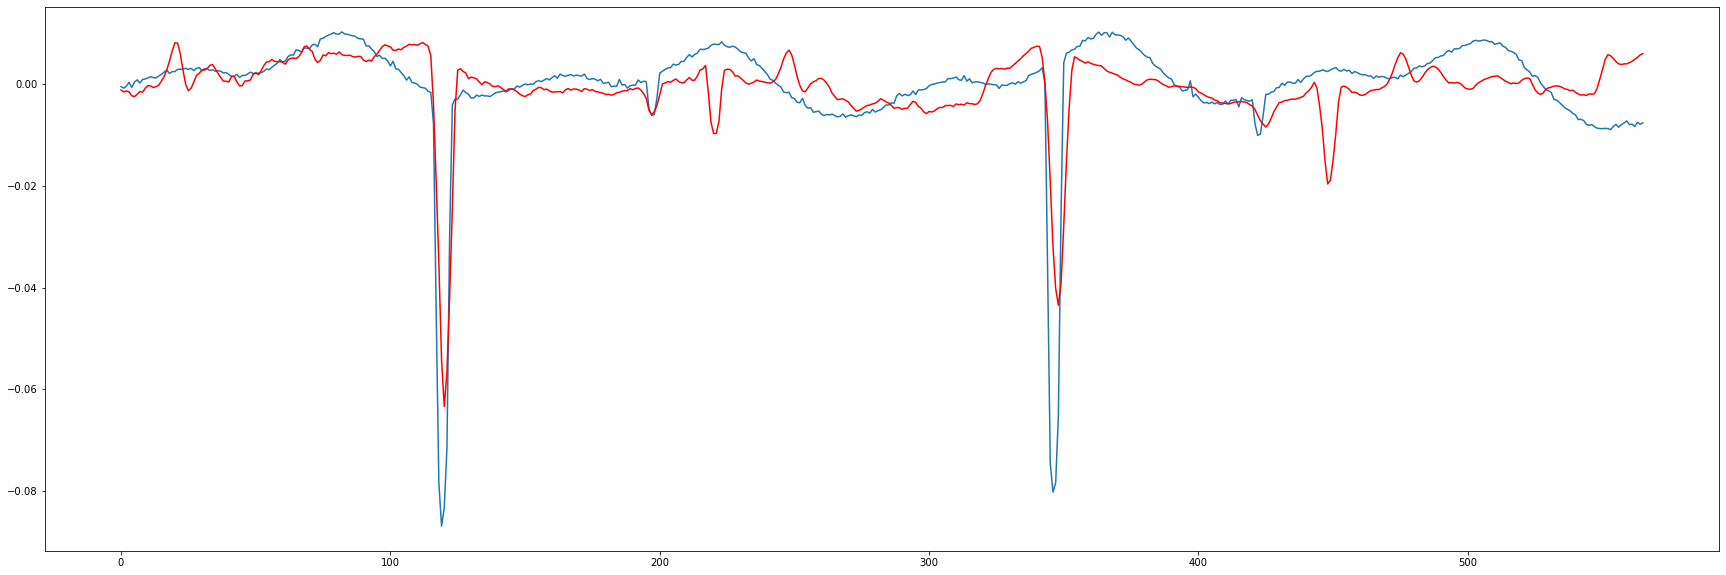

In [61]:
model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

#plot results
plt.figure(figsize=(30,10))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## ARIMA Model TODO

/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 0.011


/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


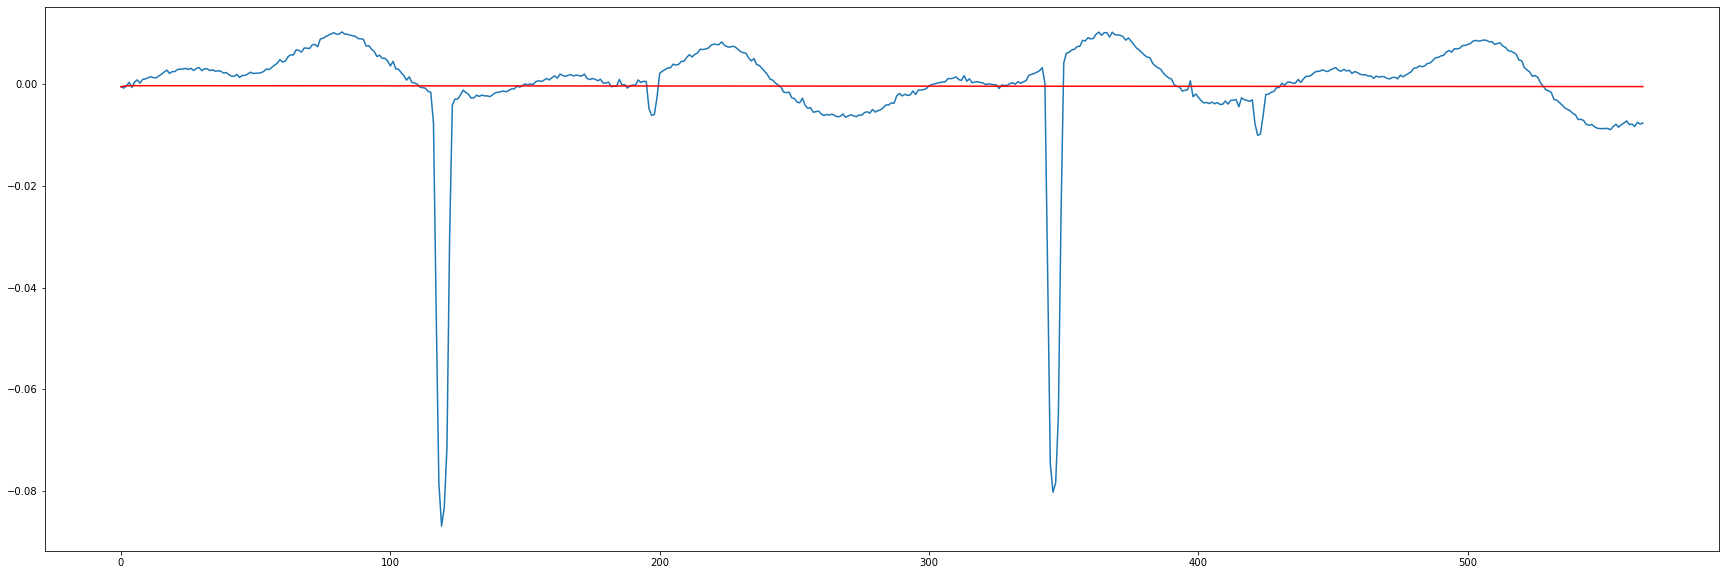

In [70]:
model = ARIMA(train, order=(1, 2, 10))
model_fit = model.fit()

#make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

#plot results
plt.figure(figsize=(30,10))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## SARIMA Model

## Smoothing

## ARC and GARC

## Linear regression

In [73]:
# time series forecasting with LSTM


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 20)                1760      
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 365, 20)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 365, 20)           3280      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 365, 10)           210       
_________________________________________________________________
time_distributed_5 (TimeDist (None, 365, 1)            11        
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________________
None


KeyboardInterrupt: 